In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/My Drive/klm")
!ls

darknet  Untitled0.ipynb


In [3]:
%cd /content/drive/My Drive/klm

/content


In [4]:
import os
os.getcwd()

'/content/drive/My Drive/klm'

In [5]:
# to download or clone darknet
#!git clone https://github.com/AlexeyAB/darknet

In [6]:

%cd darknet/

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/drive/My Drive/klm/darknet


In [7]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ claus

In [8]:
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights #-------------1

In [9]:

#%cd /content/drive/My Drive/klm/darknet/
#%cd /content/drive/My Drive/klm/darknet/data/

In [10]:
#!python process.py   #--------------- 3

In [11]:
!ls data/

11.mp4	airport.mp4	  labels  piford.data	process.py  train.txt
12.mp4	car_chase_01.mp4  piford  piford.names	test.txt    yolov4.conv.137


In [12]:
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [13]:
#%cd /content/drive/My Drive/klm/darknet/

In [14]:
!chmod +x ./darknet

In [15]:
#!./darknet detector train data/piford.data cfg/yolov4-custom.cfg yolov4.conv.137 -dont_show -map

In [16]:

%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

/content/drive/MyDrive/klm/darknet/cfg
/content/drive/MyDrive/klm/darknet


In [17]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

In [18]:
!./darknet detector test data/piford.data cfg/yolov4-custom.cfg backup/yolov4-custom_last.weights data/piford/C6.jpg -thresh 0.3

./darknet: error while loading shared libraries: libopencv_highgui.so.3.2: cannot open shared object file: No such file or directory


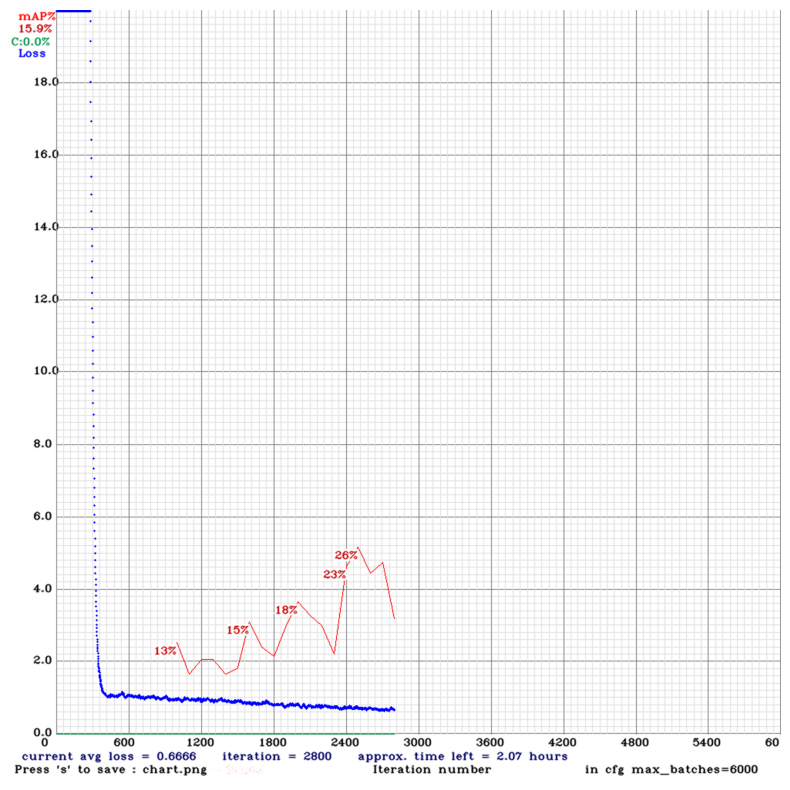

In [19]:
imShow('chart.png')

./darknet: error while loading shared libraries: libopencv_highgui.so.3.2: cannot open shared object file: No such file or directory


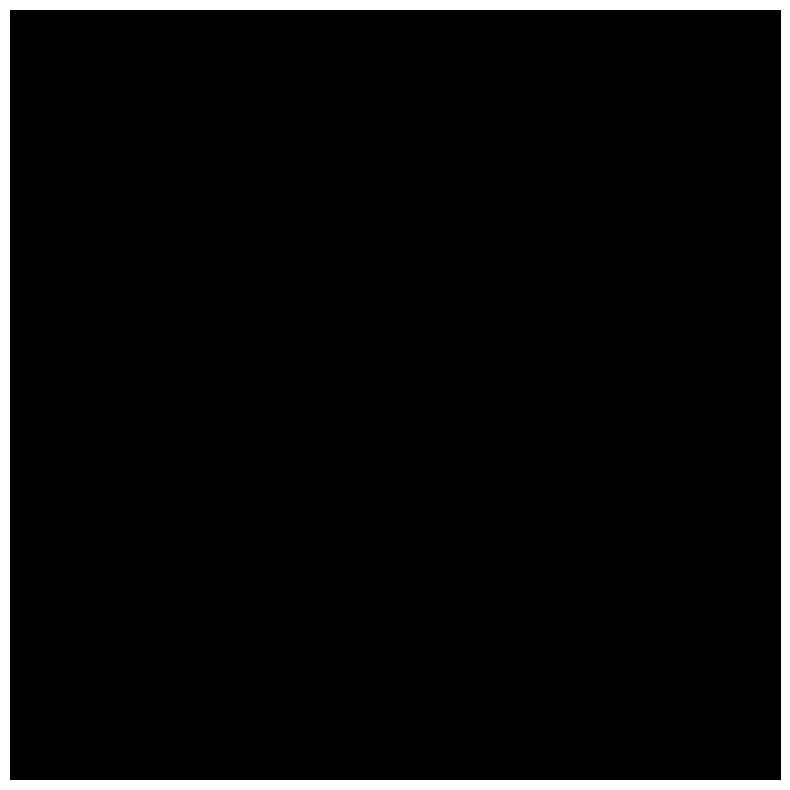

In [20]:
#!./darknet detector test data/piford.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights /mydrive/yolov4/02.jpg -thresh 0.3
#!./darknet detector test data/piford.data cfg/yolov4-custom.cfg /mydrive/yolov4/training/yolov4-custom_best.weights /mydrive/yolov4/02.jpg -thresh 0.3
!./darknet detector test data/piford.data cfg/yolov4-custom.cfg backup/yolov4-custom_best.weights data/piford/T100.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
#!./darknet detector test data/piford.data cfg/yolov4-custom.cfg backup/yolov4-custom_best.weights data/11.MP4 -thresh 0.3
#!./darknet detector test data/piford.data cfg/yolov4-custom.cfg backup/yolov4-custom_best.weights -dont_show data/car_chase_01.mp4 -i 0 -out_filename output1.avi -thresh 0.3

In [ ]:
#from google.colab import files
#files.download('output1.avi')